In [4]:
import numpy as np
import time
import cv2

image = cv2.imread("nadal.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (128, 128))  

def dft2d(image):
    M, N = image.shape
    dft_result = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            sum_value = 0
            for x in range(M):
                for y in range(N):
                    exponent = -2j * np.pi * ((u * x / M) + (v * y / N))
                    sum_value += image[x, y] * np.exp(exponent)
            dft_result[u, v] = sum_value
    return dft_result

In [5]:
start_time = time.time()
fft_image = np.fft.fft2(image)
fft_time = time.time() - start_time

print(f"FFT Computation Time: {fft_time:.4f} seconds")

FFT Computation Time: 0.0000 seconds


In [6]:
start_time = time.time()
dft_image = dft2d(image)
dft_time = time.time() - start_time
print(f"DFT Computation Time: {dft_time:.4f} seconds")

DFT Computation Time: 849.2342 seconds


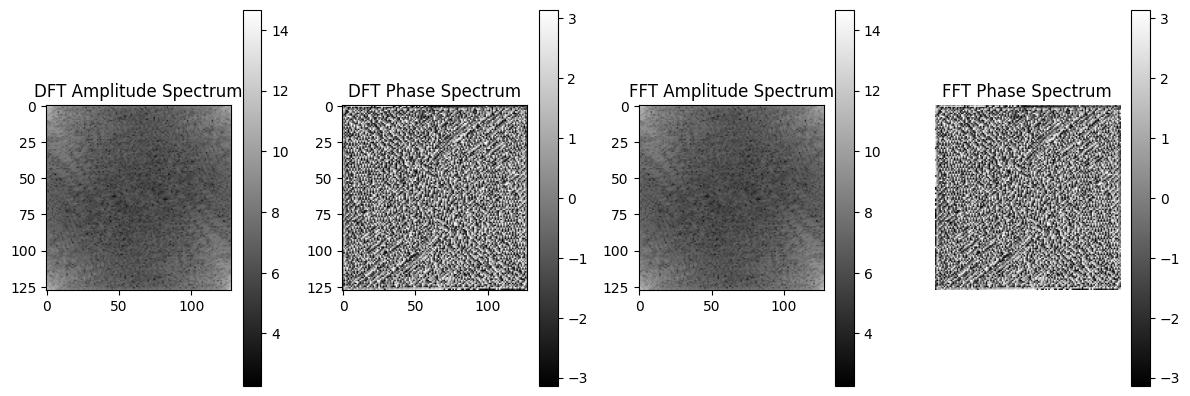

In [10]:
import matplotlib.pyplot as plt

dft_amplitude = np.abs(dft_image)
dft_phase = np.angle(dft_image)

fft_amplitude = np.abs(fft_image)
fft_phase = np.angle(fft_image)

# Shift zero frequency 
dft_amplitude_shifted = np.fft.fftshift(dft_amplitude)
dft_phase_shifted = np.fft.fftshift(dft_phase)

fft_amplitude_shifted = np.fft.fftshift(fft_amplitude)
fft_phase_shifted = np.fft.fftshift(fft_phase)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(np.log(1 + dft_amplitude), cmap='gray')
plt.title("DFT Amplitude Spectrum")
plt.colorbar()

plt.subplot(2, 4, 2)
plt.imshow(dft_phase, cmap='gray')
plt.title("DFT Phase Spectrum")
plt.colorbar()

plt.subplot(2, 4, 3)
plt.imshow(np.log(1 + fft_amplitude), cmap='gray')
plt.title("FFT Amplitude Spectrum")
plt.colorbar()

plt.subplot(2, 4, 4)
plt.imshow(fft_phase, cmap='gray')
plt.title("FFT Phase Spectrum")
plt.colorbar()

plt.axis('off')

plt.tight_layout()
plt.show()

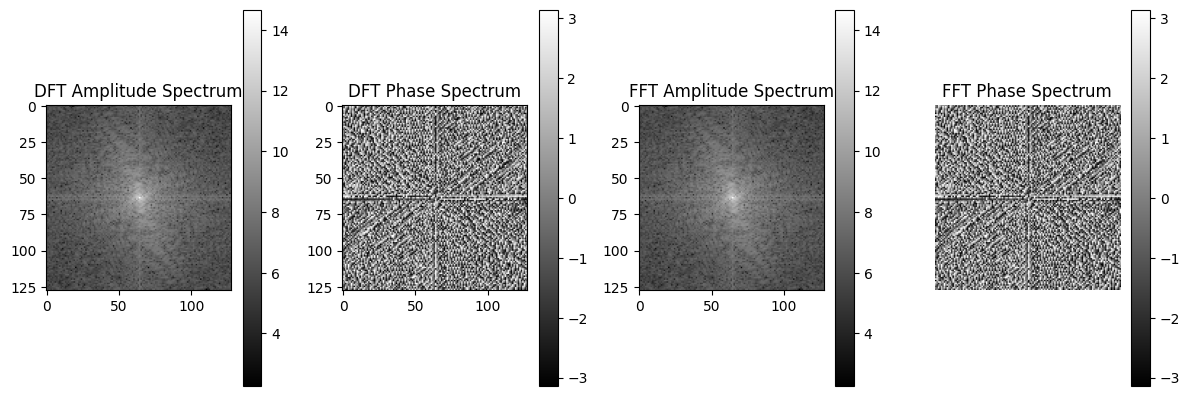

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(np.log(1 + dft_amplitude_shifted), cmap='gray')
plt.title("DFT Amplitude Spectrum")
plt.colorbar()

plt.subplot(2, 4, 2)
plt.imshow(dft_phase_shifted, cmap='gray')
plt.title("DFT Phase Spectrum")
plt.colorbar()

plt.subplot(2, 4, 3)
plt.imshow(np.log(1 + fft_amplitude_shifted), cmap='gray')
plt.title("FFT Amplitude Spectrum")
plt.colorbar()

plt.subplot(2, 4, 4)
plt.imshow(fft_phase_shifted, cmap='gray')
plt.title("FFT Phase Spectrum")
plt.colorbar()

plt.axis('off')

plt.tight_layout()
plt.show()

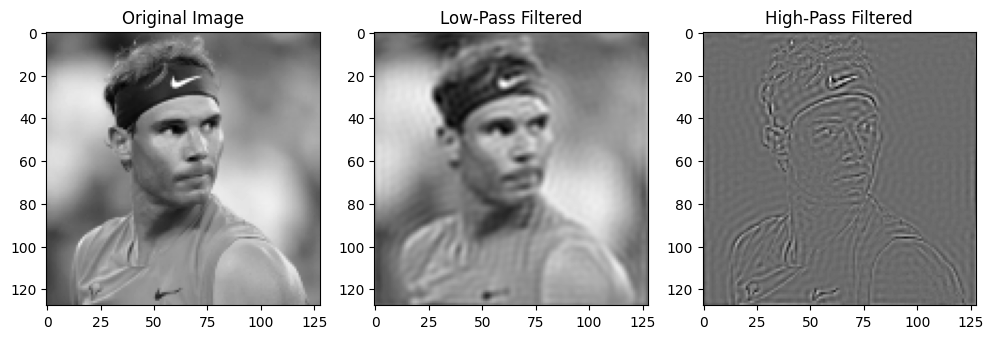

In [21]:
fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_image)


rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # center

# lpf
radius = 30  #
low_pass_mask = np.zeros((rows, cols), np.uint8)
cv2.circle(low_pass_mask, (ccol, crow), radius, 1, -1)

# hpf
high_pass_mask = 1 - low_pass_mask  # Complementary mask

low_pass_filtered = fft_shifted * low_pass_mask
high_pass_filtered = fft_shifted * high_pass_mask

low_pass_image = np.fft.ifft2(np.fft.ifftshift(low_pass_filtered)).real
high_pass_image = np.fft.ifft2(np.fft.ifftshift(high_pass_filtered)).real

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title("Low-Pass Filtered")

plt.subplot(1, 3, 3)
plt.imshow(high_pass_image, cmap='gray')
plt.title("High-Pass Filtered")

plt.show()

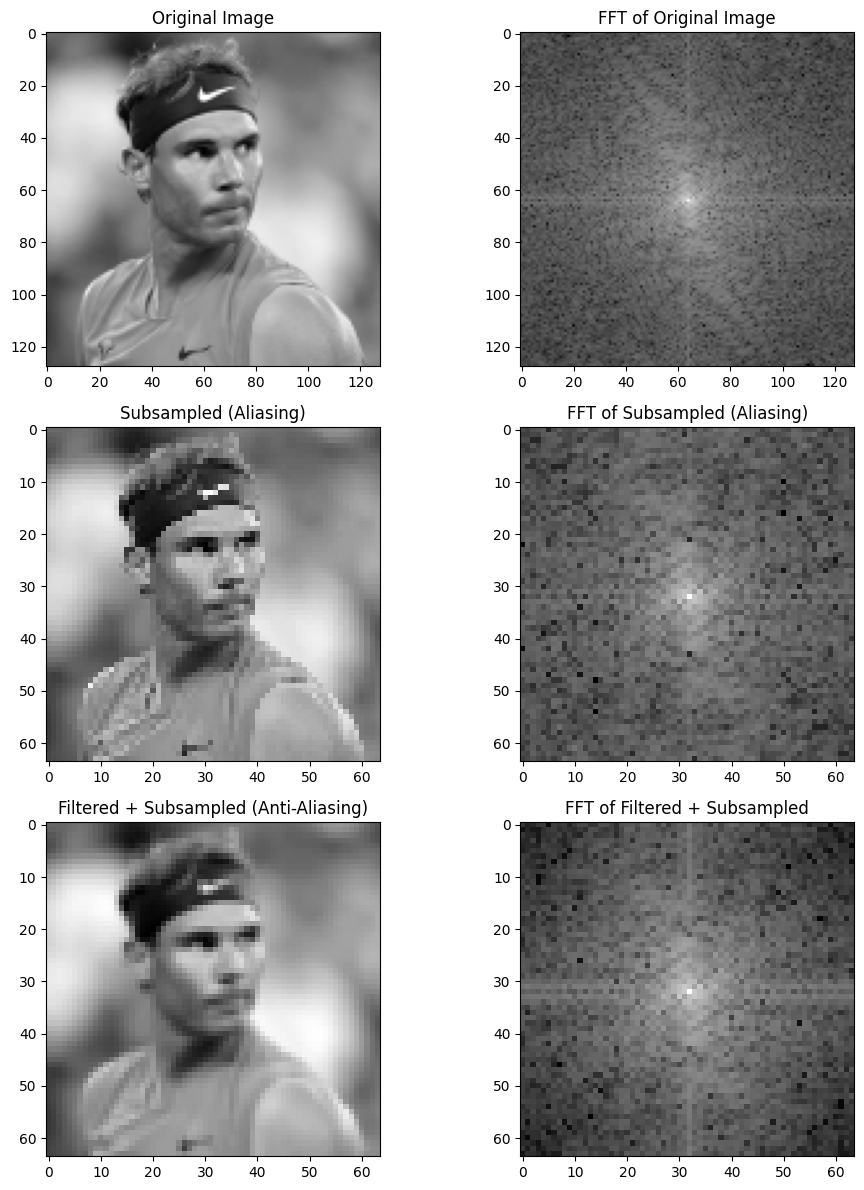

In [22]:
image_subsampled = image[::2, ::2]

blurred = cv2.GaussianBlur(image, (5, 5), 1)
image_filtered_subsampled = blurred[::2, ::2]

fft_subsampled = np.fft.fftshift(np.fft.fft2(image_subsampled))
fft_filtered_subsampled = np.fft.fftshift(np.fft.fft2(image_filtered_subsampled))

plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(3, 2, 2)
plt.imshow(np.log(1 + np.abs(fft_shifted)), cmap='gray')
plt.title("FFT of Original Image")

plt.subplot(3, 2, 3)
plt.imshow(image_subsampled, cmap='gray')
plt.title("Subsampled (Aliasing)")

plt.subplot(3, 2, 4)
plt.imshow(np.log(1 + np.abs(fft_subsampled)), cmap='gray')
plt.title("FFT of Subsampled (Aliasing)")

plt.subplot(3, 2, 5)
plt.imshow(image_filtered_subsampled, cmap='gray')
plt.title("Filtered + Subsampled (Anti-Aliasing)")

plt.subplot(3, 2, 6)
plt.imshow(np.log(1 + np.abs(fft_filtered_subsampled)), cmap='gray')
plt.title("FFT of Filtered + Subsampled")

plt.tight_layout()
plt.show()